# Model 1(using mactches.csv)

In [4]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [5]:
matches_df = pd.read_csv('matches.csv')
matches_df.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

# Replacing all the Null/NA values in 'winner' as 'Draw'

In [6]:
matches_df[pd.isnull(matches_df['winner'])]
matches_df['winner'].fillna('Draw', inplace=True)

In [7]:
matches_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)

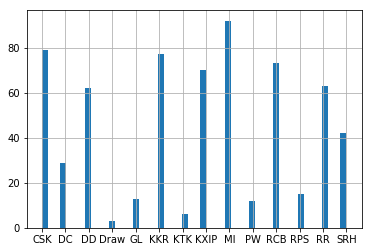

In [9]:
matches_df_updated = matches_df[['team1','team2','toss_decision','toss_winner','venue','win_by_runs','result','win_by_wickets','winner']]
matches_df_updated['winner'].hist(bins=50)

# Relating the Toss wins and matches wins

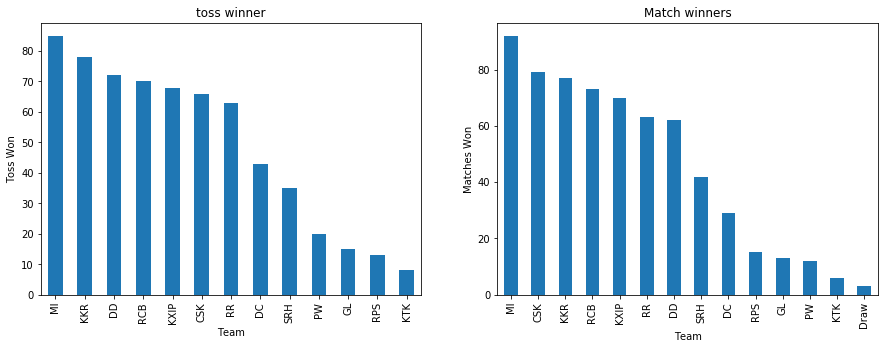

In [10]:
toss_winner = matches_df_updated['toss_winner'].value_counts()
winner = matches_df_updated['winner'].value_counts()

fig = plt.figure(figsize=(15,5))

A = fig.add_subplot(121)
A.set_xlabel('Team')
A.set_ylabel('Toss Won')
A.set_title("toss winner")
toss_winner.plot(kind = 'bar')

B = fig.add_subplot(122)
B.set_xlabel('Team')
B.set_ylabel('Matches Won')
B.set_title("Match winners")
winner.plot(kind = 'bar')

Inference: We see a linear relation between toss winners and match winners

In [11]:
matches_df_dl = matches_df[matches_df['dl_applied'] == 1]
matches_df_dl['winner'].value_counts()

KKR     4
RCB     3
SRH     2
RPS     2
CSK     2
KTK     1
DD      1
KXIP    1
Name: winner, dtype: int64

# Impact of dl_applied(Duckworth–Lewis) feature on result

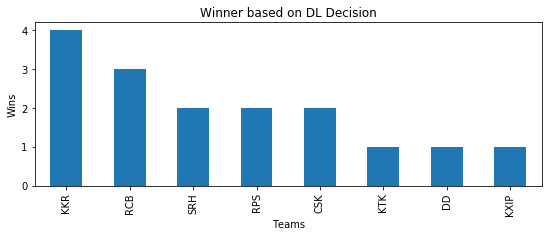

In [12]:
matches_df_dl = matches_df[matches_df['dl_applied'] == 1]
dl_applied = matches_df_dl['winner'].value_counts()
fig1 = plt.figure(figsize=(20,3))

D = fig1.add_subplot(122)
D.set_xlabel('Teams')
D.set_ylabel('Wins')
D.set_title("Winner based on DL Decision")
dl_applied.plot(kind = 'bar')

#Inference:  The Duckworth–Lewis method has been applied only in 16 matches in all the seasons(636 matches),hence it is not included to predict the winner

# Preprocessing

In [13]:
le = LabelEncoder()
matches_valid_result = matches_df_updated[matches_df_updated['result'] == 'normal']
matches_valid_result.head()
matches_encoded = matches_valid_result.apply(le.fit_transform)

Removed the unwanted records by selecting records which has 'result' as 'normal'

In [14]:
y = matches_valid_result['winner']
x = matches_encoded.drop(['winner'], axis=1)
x.head()

team1  team2  toss_decision  toss_winner  venue  win_by_runs  result  \
0     12      9              1            9     23           35       0   
1      7     10              1           10     16            0       0   
2      3      4              1            4     25            0       0   
3     10      6              1            6     11            0       0   
4      9      2              0            9     14           15       0   

   win_by_wickets  
0               0  
1               7  
2              10  
3               6  
4               0

In [15]:
ohe = OneHotEncoder()
onehot_encoded = ohe.fit_transform(x)

# Models based on different algorithms

In [16]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=64)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [17]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, onehot_encoded, y, cv = 10, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Result for Model1

In [556]:
run_models()

C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\ysidhwani\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\

Logistic Regression: 58.6816534723
K-Nearest Neighbour: 76.1693201819
Decision Tree Classifier: 85.6849781428
Random Forest Classifier: 93.1768781433
MLP: 91.0229508566
GradientBoostingClassifier: 98.2841053912
SVC: 49.601054974


In [18]:
run_models()

C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\skle

Logistic Regression: 58.6816534723
K-Nearest Neighbour: 76.1693201819
Decision Tree Classifier: 86.8620802798
Random Forest Classifier: 93.2179488005
MLP: 91.3220409009
GradientBoostingClassifier: 98.2841053912
SVC: 49.601054974


# Analysis

We can infer that the GradientBoostingClassifier for the given data gives highest accuracy of 98.28%